# Import necessary libraries

1. networkx - graph manipulation

2. random - generates random numbers

3. matplotlib - plot genetic algorithm's performance

In [1]:
import networkx as nx
import random as rand
import matplotlib.pyplot as plt

In [2]:
def generate_graph(num_nodes, num_edges):
    """
    Generates a graph based on number of nodes and edges

    Input:
    1 - num_nodes
    2 - num_edges

    Output:
    graph
    """
    return nx.gnm_random_graph(num_nodes, num_edges)

In [14]:
def generate_initial_population(graph, POPULATION_SIZE):
    """
    Generates initial population of randomly selected node from the graph

    Input:
    1 - graph

    Output:
    population
    """
    population = []
    for _ in range(POPULATION_SIZE):
        population.append([rand.choice([0,1]) for _ in range(graph.number_of_nodes())])

    return population

# Bit Flip Mutation

In [94]:
def mutation(offspring, MUTATION_RATE):
    """
    It mutates the parent (ind) to produce mutated chromosome

    Input:
    1 - offspring

    Output:
    mutate
    """
    mutate = []
    for gene in offspring:
        if rand.uniform(0.0, 1.0) < MUTATION_RATE:
            mutate.append(1 - gene)
        else:
            mutate.append(gene)
    #print(mutate)
    return mutate

# Uniform Crossover

In [5]:
def uniform_crossover(parent1, parent2):
    
    child = []
    for i in range(len(parent1)):
        if rand.uniform(0.0, 1.0) < 0.5:
            child.append(parent1[i])
        else:
            child.append(parent2[i])

    #print(child)

    return child

In [6]:
def tournament_selection(population, fitness_score, tournament_size = 3):
    """
    Input:
    population
    fitness_score
    tournament_size

    Output:
    selected_parent
    """
    
    T = tuple(zip(population,fitness_score))
    
    candidate = rand.sample(T, tournament_size)
    selected_parent = min(candidate, key=lambda x:x[1])[0]
        
    return selected_parent


In [110]:
def print_layout(graph, sol):
    """Displays graph layout with selected nodes colored in red"""
    n_list = []
    pos = nx.circular_layout(graph)

    for i in range(len(sol)):
        if sol[i] == 1:
            n_list.append(i)
    
    nx.draw(graph, pos, with_labels=True)
    nx.draw_networkx_nodes(graph, pos, nodelist=n_list, node_color="tab:red")
    plt.show()

In [8]:
def fitness(G, ind, penalty_weight = 100):
   score = 0
   uncovered = 0

   for u, v in G.edges:
      if ind[u] == 0 and ind[v] == 0:
         uncovered += 1
   score = sum(ind) + (uncovered * penalty_weight)
   return score


In [ ]:

def run_ga(G, POPULATION_SIZE = 100, MUTATION_RATE = 0.5, GENERATION = 100):
   pop = generate_initial_population(G, POPULATION_SIZE)
   best_fitness_per_gen = []
   
   for i in range(GENERATION):
      fitness_score = [fitness(G, ind) for ind in pop]

      new_population = []
      
      for _ in range(POPULATION_SIZE):
         parent1 = tournament_selection(pop, fitness_score)
         parent2 = tournament_selection(pop, fitness_score)
         offspring = uniform_crossover(parent1, parent2)
         offspring = mutation(offspring, MUTATION_RATE)
         new_population.append(offspring)

      
      pop = new_population
      fitness_score = [fitness(G, ind) for ind in pop]
      best_fitness = min(fitness_score)
      best_fitness_per_gen.append(best_fitness)
      print(f"Generation {i} : Best Fitness : {best_fitness} {fitness_score.index(min(fitness_score))}")

   
   return pop
   

In [ ]:
G = generate_graph(50, 100)
pop = run_ga(G, POPULATION_SIZE=100, MUTATION_RATE=0.02, GENERATION=150)

Generation 0 : Best Fitness : 833 83
Generation 1 : Best Fitness : 436 12
Generation 2 : Best Fitness : 336 31
Generation 3 : Best Fitness : 334 10
Generation 4 : Best Fitness : 337 99
Generation 5 : Best Fitness : 137 45
Generation 6 : Best Fitness : 135 49
Generation 7 : Best Fitness : 38 99
Generation 8 : Best Fitness : 37 92
Generation 9 : Best Fitness : 38 73
Generation 10 : Best Fitness : 36 7
Generation 11 : Best Fitness : 35 97
Generation 12 : Best Fitness : 34 52
Generation 13 : Best Fitness : 35 20
Generation 14 : Best Fitness : 34 12
Generation 15 : Best Fitness : 34 5
Generation 16 : Best Fitness : 34 20
Generation 17 : Best Fitness : 35 25
Generation 18 : Best Fitness : 36 11
Generation 19 : Best Fitness : 34 10
Generation 20 : Best Fitness : 33 26
Generation 21 : Best Fitness : 35 68
Generation 22 : Best Fitness : 34 41
Generation 23 : Best Fitness : 34 12
Generation 24 : Best Fitness : 34 79
Generation 25 : Best Fitness : 33 33
Generation 26 : Best Fitness : 31 8
Generat

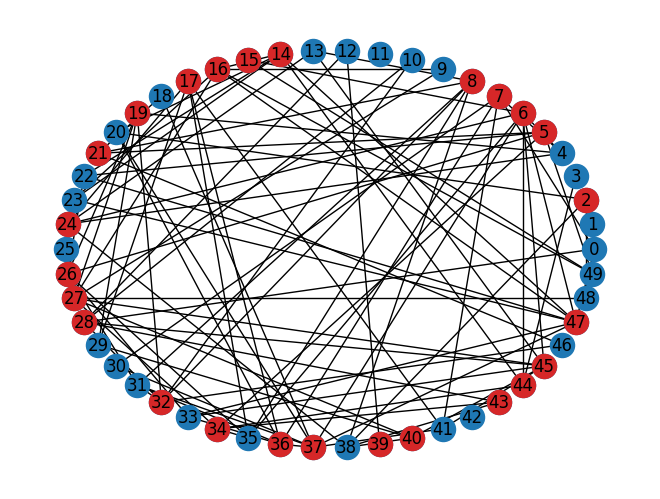

25


In [181]:
print_layout(G,pop[0])
print(sum(pop[0]))